# Homework Assignment 1

### **Due:** Friday, Oct 7th, 11:59pm

In this assignment, you will import data to Python from different sources and see how they need to be approached and analyzed in different ways. You will go through randomly created synthetic data, real-life medical data and New York City (NYC) bikeshare data, respectively. For the all datasets, you will be required to do some brief research to explain the results you find.

In [1]:
# This cell imports all the libraries you need for this assignment
import random
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

### 1) Randomly Created Data

**a)** Let's create a synthetic medical dataset using the random library of Python. There is a list of names below. Using those names as patient names, you need to create a pandas DataFrame where each row is a patient with the following variables: Index, Name, Age, Weight, Height, Systolic Blood Pressure (BP), Diastolic Blood Pressure (BP), Resting Heart Rate (HR)

More information on some variables:

- **Index:** A code that should start from pat1 and end at pat26. (There are 26 names below.)
- **Name:** The name from the list.
- **Age:** A random number between 18 and 70
- **Weight:** A random number between 100 and 230 lbs.
- **Height:** A random number between 58 and 80 inches.
- **Systolic BP:** The pressure the heart exerts on the walls of the arteries each time it beats. (The unit is mm-Hg) In the dataset, this is a random number between 100 and 150.
- **Diastolic BP:** The pressure the heart exerts on the walls of the arteries each time between beats. (The unit is mm-Hg) In the dataset, this is a random number between 60 and 100.
- **Resting HR:** Number of times the heart beats in a minute while the patient is in rest state. In the dataset, this is a random number between 60 and 130.

In [2]:
# The list of patient names
names = ['Alice', 'Bob', 'Charlie', 'David', 'Erin', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy', 'Kisa', 'Liam', 'Mike', 'Niaj', 'Olivia', 'Peggy', 'Quentin', 'Rupert', 'Sybil', 'Ted', 'Usman' ,'Victor', 'Walter', 'Xavier','Yvonne', 'Zara']

# A random seed for reproducible results
random.seed(123)

# Create an empty list. This list will be a list of dictionaries.
dicts = []

# Using a for loop, create a list of dictionaries. Each dictionary should have 8 key-value pairs.
# Make sure you follow the specifications above.
# Hint: Read the documentation of random.randint
                   
# Create the for loop
for index in range(len(names)):
    people = {'index': 'pat' + str(index+1), 
          'name': names[index],
          'age': random.randint(18,70), 
          'weight': random.randint(100,230),
          'height': random.randint(58,80),
          'systolic bp': random.randint(100,150),
          'diastolic bp': random.randint(60,100),
          'resting hr': random.randint(60,130)}
    dicts.append(people)

# Convert the list of dictionaries to a pandas dataframe (This should be one line of code.)
data = pd.DataFrame(dicts)

# Set the Index column as the dataframe index. (Look up .set_index() method of a dataframe)
data.set_index('index', inplace = True)

**b)** Find the correlation of all the numeric columns with each other. This can be implemented in one line using a method - please look it up.

In [3]:
data.corr()

,age,weight,height,systolic bp,diastolic bp,resting hr
age,1.000000,0.082382,0.119375,-0.333409,0.079024,0.028374
weight,0.082382,1.000000,-0.429398,-0.012589,0.150211,0.112266
height,0.119375,-0.429398,1.000000,-0.086407,-0.232189,0.193372
systolic bp,-0.333409,-0.012589,-0.086407,1.000000,0.082579,-0.063694
diastolic bp,0.079024,0.150211,-0.232189,0.082579,1.000000,-0.120371
resting hr,0.028374,0.112266,0.193372,-0.063694,-0.120371,1.000000


**c)** What do you see in the correlation matrix? Can this synthetic data be mistaken as real-life data after this quick statistical analysis? Justify your answer with examples from the results above.

Surprisingly, I see quite a few negative correlations. I do not believe that this synthetic data can be mistaken as real-life data after this quick statistical analysis for a few reasons. One in particular is the fact that the correlation between height and weight is -0.429398 meaning that as height increases, weight decreasess and vice versa. This relationship does not reflect the common sense that as height increases weight tends to increase as well overall.

### 2) Data from Flat Files - 1

**a)** Let's move on to real-life datasets. Load the diabetes data as a DataFrame and take a quick look at it.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Native American heritage.

- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure:** Diastolic blood pressure (mm Hg)"
- **SkinThickness**:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction:** The function that scores likelihood of diabetes based on family history
- **Age:** Age (years)
- **Outcome:** Diagnosed with diabetes or not (0 or 1)

In [4]:
# Load the csv file
diabetes = pd.read_csv('diabetes.csv')
# Print the first 15 lines
diabetes.head(15)
# Print some basic statistical facts using one line of code.
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**b)** You should see something that is not right above. Indicate the misleading data. Filter out the lines that do not make sense.

In this context, certain values do not make sense for particular variables. In this case, values of glucose, blood pressure, skin thickness, insulin levels, and BMI equalling zero either makes no sense or is impossible for someone alive. As a result, I have chosen to remove those values, and their corresponding observations, from the dataset.

In [5]:
log_array = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]>0
data_filtered = diabetes[log_array]
data_filtered[['Pregnancies', 'Age','Outcome','DiabetesPedigreeFunction']] = diabetes[['Pregnancies', 'Age','Outcome','DiabetesPedigreeFunction']]
data_filtered.dropna(axis = 0, how ='any', inplace=True)
data_filtered.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


**c)** After cleaning the data, print the correlation matrix of the dataframe. What do you see? Do the correlations make more sense? Justify your answer with an example of a highly correlated pair.

In [6]:
data_filtered.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


Having cleaned the code and filtered out the rows with observations that did not make sense has made the resulting correlations more sensible. For example, the very high correlation between age and number of pregnancies makes logical real sense and tracks with common sense.

**d)** Pick a pair of highly correlated variables and plot them against one another. (**Hint:** Look up the .plot() method of a dataframe.) You need to create a scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

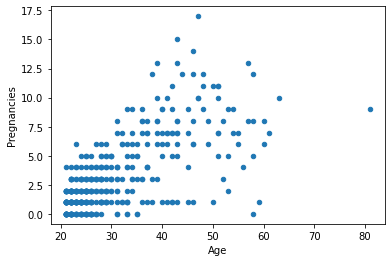

In [7]:
data_filtered.plot(x = 'Age', y = 'Pregnancies', kind = 'scatter')

### 3) Data from Flat Files - 2

**a)** Load the insurance charge dataset introduced in class. As we discussed, there are four numerical and three categorical variables in this dataset. One numerical variable is the total insurance charge. Find the two numerical variables (out of the remaining three) that have the highest correlation with this insurance charge variable.

In [8]:
# Load the csv file.
insurance = pd.read_csv('health_insurance_prediction.csv')

# Print the first 10 lines.
insurance.head(10)

# Find the two variables that have the highest correlation with the insurance charges.
insurance.corr()
print('The age and bmi variables have the highest correlation with the insurace charges.')

The age and bmi variables have the highest correlation with the insurace charges.


**b)** Using the method in Question 2, plot both of these numerical variables against the insurance charge on different figures. (using a scatter plot) Do you see a pattern? Is there only one trend in the graphs? Briefly describe what you see.

A pattern is more obvious in the charges against age scatterplot. There seems to be three separate bands of points all clustered around three generally straight lines. It's a pretty distinct pattern. Meanwhile the scatterplot of the charges against bmi is all more unclear in terms of a pattern.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

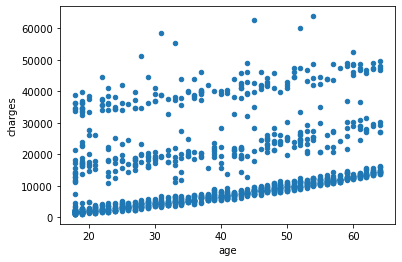

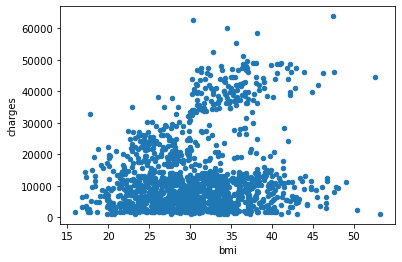

In [9]:
insurance.plot(x = 'age', y = 'charges', kind = 'scatter')
insurance.plot(x = 'bmi', y = 'charges', kind = 'scatter')

**c)** Use the categorical variables in the dataset to explain the trends in the scatter plots. To do this, the .plot() method will not be enough; you need the high-level visualization library in Python: Seaborn.

It is already uploaded above and has many tools. For our purposes, what you need is the **scatterplot** function. Read its documentation.

Use the **scatterplot** function and the categorical variables to find out the underlying reason for what you observed above. Display all the plots you create and clearly justify your results.

By comparing the distribution of points across the scatterpoints when taking into account the affects of the categorical variables like sex, region, and whether the patient is a smoker, I was able to see a clear answer to the underlying reasoning for the above observations. While sex and region seemed to generally be evenly distributed, there was a clear disparity in the location of data points when considering the smoker variable. As can be seen below, regardless of age, non-smokers were charged considerably less. Parallel to this, almost regardless of bmi, non-smokers were also charged less than smokers were.

<AxesSubplot:xlabel='age', ylabel='charges'>

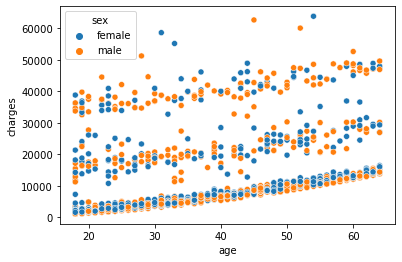

In [10]:
sns.scatterplot(data=insurance, x = 'age', y = 'charges', hue = 'sex')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

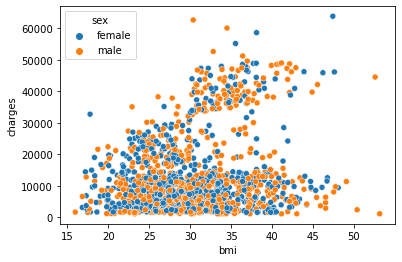

In [11]:
sns.scatterplot(data=insurance, x = 'bmi', y = 'charges', hue = 'sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

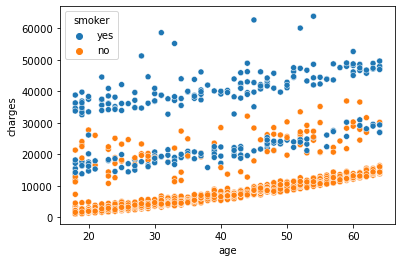

In [12]:
sns.scatterplot(data=insurance, x = 'age', y = 'charges', hue = 'smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

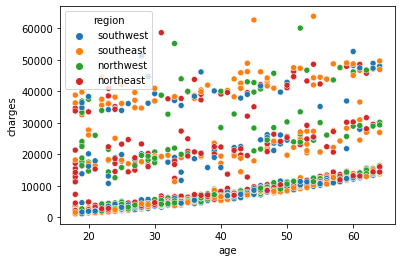

In [13]:
sns.scatterplot(data=insurance, x = 'age', y = 'charges', hue = 'region')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

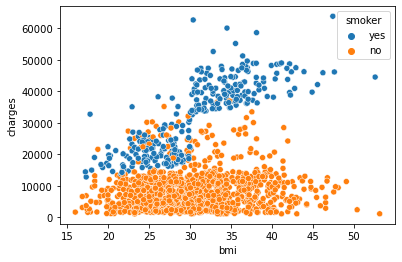

In [14]:
sns.scatterplot(data=insurance, x = 'bmi', y = 'charges', hue = 'smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

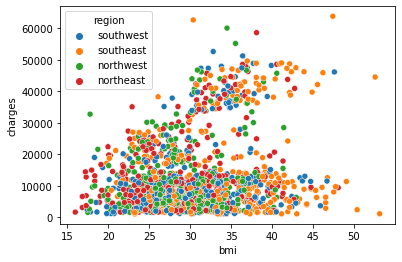

In [15]:
sns.scatterplot(data=insurance, x = 'bmi', y = 'charges', hue = 'region')

### 4) Data from Flat Files - Timeseries

**a)** Load the bikeshare dataset. You should see usage data of one bike in the NYC bikeshare system for three months. (Note that the bike number is the same in all rows.)

Each row contains information on where and when the bike was taken and returned. Your columns of interest are the datetime columns.

Read the data first, minding the datetime columns.

In [16]:
# Read the csv file like the files above - with one difference: 
    #You need to make sure that the datetime columns are read in the correct format.
    # You can try and see why pd.read_csv('capital-onebike.csv') is not a good idea by checking the column data types.
    # Hint: Read the documentation of read_csv, focusing on the parse_dates input.
bikes = pd.read_csv('capital-onebike.csv', parse_dates =['Start date','End date'])
# Print the datatypes of each column.
bikes.dtypes

Start date              datetime64[ns]
End date                datetime64[ns]
Start station number             int64
Start station                   object
End station number               int64
End station                     object
Bike number                     object
Member type                     object
dtype: object

**b)** Let's answer three questions next:
- What is the average duration that the bike is taken?
    **The average duration that the bike was taken was 19 minutes and 38 seconds.**
- How long was the bike used in total?
    **The bike was used in total 3 days and 22 hours, 58 minutes, and 10 seconds.**
- What percentage of the total time in the dataset is the total usage time of the bike?
    **The usage time of the total time in the dataset is 4.39%.**

In [17]:
# Using the Start date and End date cols, create a Duration column.
bikes['Duration']=bikes['End date'] - bikes['Start date']
# Using the Start date, End date and Duration column and the summary statistics methods of a dataframe,
# answer the questions above.
bikes.describe()

usage = bikes['Duration'].sum()
time = bikes['End date'].max() - bikes['Start date'].min() # Total time period

usage/time

0.043968760304474885

**c)** Finally, see if there are any anomalities in the time columns of the dataset.

- Eliminate the outlier
- Explain the data point that does not make any sense.

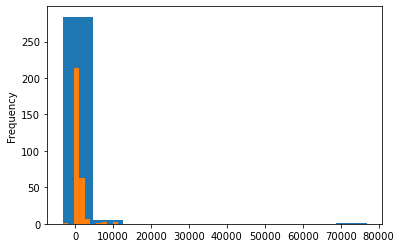

In [18]:
# Create a Duration_Sec column using the Duration column and .dt.total_seconds() method
bikes['Duration_Sec'] = bikes['Duration'].dt.total_seconds()

# Plot the histogram distribution of the Duration_Sec column using the .plot() method
bikes['Duration_Sec'].plot(kind='hist')

# Do you see the outlier? Filter it out and create a new dataframe
log_array = bikes['Duration_Sec']<50000
bikes_filtered = bikes[log_array]

# Plot the histogram distribution again using the new, filtered dataframe. What anomaly do you see this time?
bikes_filtered['Duration_Sec'].plot(kind='hist')

# Save the row that creates that anomaly to a new variable and print it. Why do you think this row is recorded this way?
bikes_filtered['Duration_Sec'].min()

new_anomaly = bikes_filtered.loc[bikes_filtered['Duration_Sec']==-3346]

The new anomaly is that the time duration (in seconds) was negative when of course duration cannot be a negative. The row that held this value has the row index of 129. The reason that the row was recoded this way was because November 5th, 2017 saw us gain an hour of time as a result of daylight savings time. So while that bike ride was happening, the clocks went back an hour in time and resulted in a negative time duration value.